# KNN Projekt

#### Načítanie datasetu:

In [26]:
import numpy as np
import dataset

In [27]:
import importlib
importlib.reload(dataset)

<module 'dataset' from '/home/anakin/skola/leto/KNN/scripts/dataset.py'>

In [28]:
# loading a locally stored dataset that contains 10 data points
data_set = dataset.load_data_set('../res/cache/datasets/dataset_322')

In [29]:
for dp in data_set.data_points:
    dp.add_language()

In [5]:
from translator import load_cs_model, load_de_model, unload_model, translate

In [30]:
import translator

In [31]:
import model
import visualise

#### Vizualizácia jedného datového bodu z datasetu:

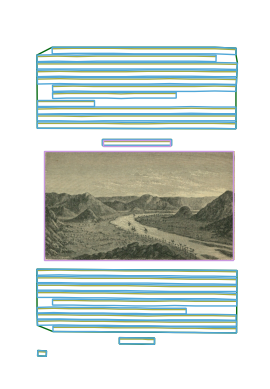

In [32]:
for dp in data_set.data_points[:1]:
    visualise.plot_text_regions(dp)

In [9]:
import importlib
importlib.reload(model)

<module 'model' from '/home/anakin/skola/leto/KNN/scripts/model.py'>

# Vyhodnotenie datasetu:

a) Vyhodnocovanie datasetu pomocou clipu, kde sú do clipu posielané iba jednotlivé riadky datasetu

In [33]:
import tqdm

In [34]:
from importlib import reload
reload(translator)

<module 'translator' from '/home/anakin/skola/leto/KNN/scripts/translator.py'>

In [35]:
data_set.error_uuids.add("44de430c-119b-11e8-a3ad-00155d012102")

In [38]:
translator.translate_dataset(data_set)

Translating czech datapoints: 100%|██████████| 322/322 [06:30<00:00,  1.21s/it]


cuda


Translating german datapoints: 100%|██████████| 322/322 [00:37<00:00,  8.56it/s]


In [25]:
chunk_size = 1
model_results = []

for i in tqdm.tqdm(range(0, len(data_set.data_points), chunk_size)):
    chunk = data_set.data_points[i:i+chunk_size]
    model_results.extend([ model.compute_clip_probs(data_point) for data_point in chunk])

  0%|          | 0/322 [00:00<?, ?it/s]


TypeError: compute_clip_probs() missing 2 required positional arguments: 'mymodel' and 'mytokenizer'

Výsledkom tohto vyhodnotenia sú jednotlivé riadky uložné s ich vzdialenosťami a informáciami o riadkoch.

In [16]:
model_results[:1]

[{<annotation.ImageAnnotation at 0x7f4a431664d0>: [(<parse_xml.TextLine at 0x7f4a430d0350>,
    0.9919999837875366),
   (<parse_xml.TextLine at 0x7f4a430d3bd0>, 0.0068962182849645615),
   (<parse_xml.TextLine at 0x7f4a430d0d90>, 0.0005660760216414928),
   (<parse_xml.TextLine at 0x7f4a430d2290>, 0.0003406705509405583),
   (<parse_xml.TextLine at 0x7f4a43165d50>, 6.655996548943222e-05),
   (<parse_xml.TextLine at 0x7f4a43165f90>, 5.306624007062055e-05),
   (<parse_xml.TextLine at 0x7f4a430d19d0>, 4.1652165236882865e-05),
   (<parse_xml.TextLine at 0x7f4a430d0ad0>, 1.1476378858787939e-05),
   (<parse_xml.TextLine at 0x7f4a430d1a10>, 7.644915967830457e-06),
   (<parse_xml.TextLine at 0x7f4a430d3090>, 5.21338006365113e-06),
   (<parse_xml.TextLine at 0x7f4a430d0ed0>, 4.060184892296093e-06),
   (<parse_xml.TextLine at 0x7f4a430d1610>, 3.9972373997443356e-06),
   (<parse_xml.TextLine at 0x7f4a430d08d0>, 1.553158995193371e-06),
   (<parse_xml.TextLine at 0x7f4a430d3210>, 1.1815810694315587e-0

In [17]:
eval_results = [model.eval_clip_result(dp, clip) for dp, clip in zip(data_set, model_results)]
eval_results

Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`


[{<annotation.ImageAnnotation at 0x7f4a431664d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4a431742d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4a42780cd0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4a42783910>: 0.5185185185185186},
 {<annotation.ImageAnnotation at 0x7f4a42792650>: 0.8947368421052632},
 {<annotation.ImageAnnotation at 0x7f4a42804d10>: 0.7531380753138075},
 {<annotation.ImageAnnotation at 0x7f4a428209d0>: 0.9655172413793104},
 {<annotation.ImageAnnotation at 0x7f4a4282bf50>: 0.6460176991150443},
 {<annotation.ImageAnnotation at 0x7f4a42869210>: 0.97953216374269},
 {<annotation.ImageAnnotation at 0x7f4a42681b90>: 0.8294117647058823},
 {<annotation.ImageAnnotation at 0x7f4a42688510>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4a4268abd0>: 0.7878787878787878},
 {<annotation.ImageAnnotation at 0x7f4a426c1c10>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4a43147610>: 0.4294117647058824},
 {<annotation.ImageAnnotation at 0x7f4a43170490>: 0.9316239316239316},
 {<annotatio

Výpočet výslednej efektivity modelu:

In [18]:
np.mean([el for val in eval_results for el in list(val.values())])

0.8308099783070376

b) Vyhodnocovanie datasetu pomocou clipu, kde sú do clipu posielané jednotlivé vety z datasetu.

In [10]:
chunk_size = 1
model_results = []

for i in tqdm.tqdm(range(0, len(data_set.data_points), chunk_size)):
    chunk = data_set.data_points[i:i+chunk_size]
    model_results.extend([ model.compute_clip_probs_sentence(data_point) for data_point in chunk])

100%|██████████| 322/322 [00:38<00:00,  8.38it/s]


In [19]:
del model_results

In [11]:
eval_results = [model.eval_clip_result(dp, clip) for dp, clip in zip(data_set, model_results)]
eval_results

Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`


[{<annotation.ImageAnnotation at 0x7f4fbe48d050>: 0.6521739130434783},
 {<annotation.ImageAnnotation at 0x7f4fbe4b2690>: 0.7857142857142857},
 {<annotation.ImageAnnotation at 0x7f4fbe4bbfd0>: 0.8461538461538461},
 {<annotation.ImageAnnotation at 0x7f4fbe4c79d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4d7e50>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3206d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe346650>: 0.9523809523809523},
 {<annotation.ImageAnnotation at 0x7f4fbe36e1d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3ae650>: 0.5202020202020202},
 {<annotation.ImageAnnotation at 0x7f4fbe3d1f50>: 0.4818181818181818},
 {<annotation.ImageAnnotation at 0x7f4fbe3db590>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3df990>: 0.6521739130434783},
 {<annotation.ImageAnnotation at 0x7f4fbc7b8250>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbc7ced90>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbc7efb50>: 0.6897689768976898},
 {<annotation.ImageAnnotation at 0x7f4fb

Výpočet výslednej efektivity modelu

In [12]:
np.mean([el for val in eval_results for el in list(val.values())])

0.7755343965249718